In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r'C:\Users\Dhanesh\Downloads\SpamClassifier-master\smsspamcollection\SMSSpamCollection', sep='\t' , names=['labels','messages'])
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.describe()

,labels,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
duplicatedRow = data[data.duplicated()]
print(duplicatedRow[:5])

    labels                                           messages
103    ham  As per your request 'Melle Melle (Oru Minnamin...
154    ham  As per your request 'Melle Melle (Oru Minnamin...
207    ham  As I entered my cabin my PA said, '' Happy B'd...
223    ham                             Sorry, I'll call later
326    ham                   No calls..messages..missed calls


In [6]:
ham = data[data.labels =='ham']
spam= data[data.labels =='spam']

In [7]:
ham.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [8]:
spam.head()

,labels,messages
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [9]:
ham.shape , spam.shape

((4825, 2), (747, 2))

In [10]:
data["labels"].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

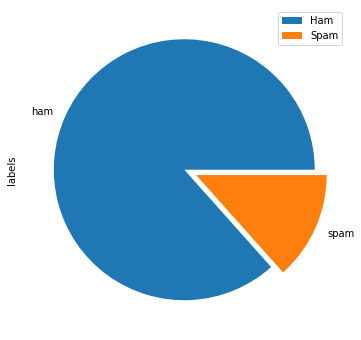

In [11]:
data["labels"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6))
plt.legend(["Ham", "Spam"])
plt.show()

c:\users\dhanesh\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='labels', ylabel='count'>

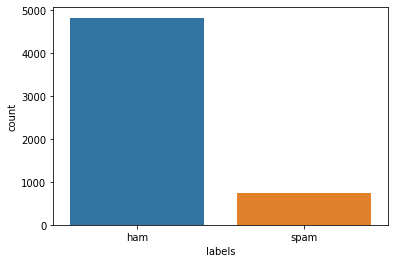

In [12]:
sns.countplot(data.labels)

In [13]:
new_data = pd.concat([ham,spam])
new_data

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [14]:
ham_msg_txt = " ".join(ham.messages.to_numpy().tolist())
spam_msg_txt = " ".join(spam.messages.to_numpy().tolist())

In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dhanesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
from wordcloud import WordCloud

In [18]:
ham_msg_wcloud = WordCloud(width =520, height =260, stopwords=stop,max_font_size=50, background_color ="black", colormap='Blues').generate(ham_msg_txt)

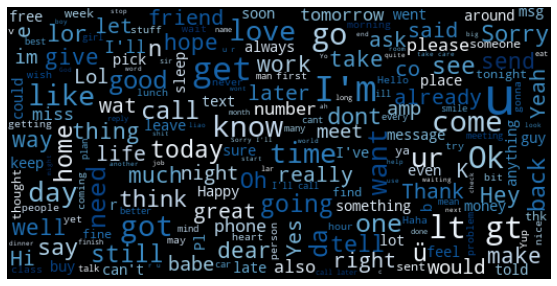

In [19]:
plt.figure(figsize=(15,5))
plt.imshow(ham_msg_wcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

In [20]:
ham_msg_wcloud = WordCloud(width =520, height =260, stopwords=stop,max_font_size=50, background_color ="black", colormap='Greens').generate(spam_msg_txt)

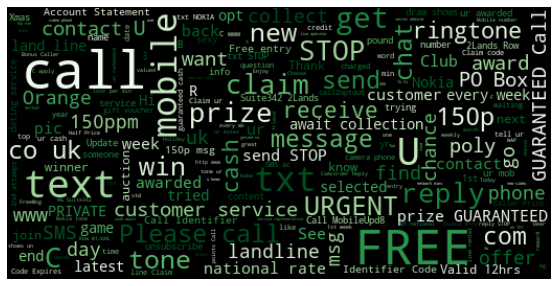

In [21]:
plt.figure(figsize=(15,5))
plt.imshow(ham_msg_wcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

# Data Preprocessing 

In [22]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dhanesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
len(stop)

179

In [25]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [26]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [27]:
new_data

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [28]:
import string
def cleanText(messages):
    messages = messages.translate(str.maketrans('', '', string.punctuation))
    messages = re.sub('[^a-zA-Z]', ' ', messages)
    messages = messages.lower()
    messages = messages.split()
    words = [ps.stem(word) for word in messages if word not in stop]
    return " ".join(words)



new_data['messages'] = new_data['messages'].apply(cleanText)
new_data


,labels,messages
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though
6,ham,even brother like speak treat like aid patent
...,...,...
5537,spam,want explicit sex sec ring cost pmin gsex pobo...
5540,spam,ask mobil chatlin inclu free min india cust se...
5547,spam,contract mobil mnth latest motorola nokia etc ...
5566,spam,remind get pound free call credit detail great...


In [29]:
map = {'ham' : 0 , 'spam' : 1}
new_data['labels'] = new_data['labels'].map(map)

In [30]:
new_data

,labels,messages
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
3,0,u dun say earli hor u c alreadi say
4,0,nah dont think goe usf live around though
6,0,even brother like speak treat like aid patent
...,...,...
5537,1,want explicit sex sec ring cost pmin gsex pobo...
5540,1,ask mobil chatlin inclu free min india cust se...
5547,1,contract mobil mnth latest motorola nokia etc ...
5566,1,remind get pound free call credit detail great...


In [31]:
new_data['length']=new_data['messages'].apply(len)
new_data

,labels,messages,length
0,0,go jurong point crazi avail bugi n great world...,76
1,0,ok lar joke wif u oni,21
3,0,u dun say earli hor u c alreadi say,35
4,0,nah dont think goe usf live around though,41
6,0,even brother like speak treat like aid patent,45
...,...,...,...
5537,1,want explicit sex sec ring cost pmin gsex pobo...,55
5540,1,ask mobil chatlin inclu free min india cust se...,109
5547,1,contract mobil mnth latest motorola nokia etc ...,108
5566,1,remind get pound free call credit detail great...,90


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(new_data['messages']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
columns = cv.get_feature_names()
columns

['aa',
 'aah',
 'aaniy',
 'aaooooright',
 'aathilov',
 'aathiwher',
 'ab',
 'abbey',
 'abdomen',
 'abeg',
 'abelu',
 'aberdeen',
 'abi',
 'abil',
 'abiola',
 'abj',
 'abl',
 'abnorm',
 'abouta',
 'abroad',
 'absenc',
 'absolut',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abus',
 'ac',
 'academ',
 'acc',
 'accent',
 'accentur',
 'accept',
 'access',
 'accid',
 'accident',
 'accommod',
 'accommodationvouch',
 'accomod',
 'accordin',
 'accordingli',
 'accordinglyor',
 'account',
 'accumul',
 'ach',
 'achanammarakheshqatar',
 'achiev',
 'acid',
 'acknowledg',
 'acl',
 'acnt',
 'acoentri',
 'across',
 'acsmsreward',
 'act',
 'actin',
 'action',
 'activ',
 'actor',
 'actual',
 'acwicmb',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'addi',
 'addict',
 'address',
 'addressul',
 'adewal',
 'adi',
 'adjust',
 'admin',
 'administr',
 'admir',
 'admiss',
 'admit',
 'admiti',
 'ador',
 'adp',
 'adress',
 'adrian',
 'adrink',
 'adsens',
 'adult',
 'advanc',
 'adventur',
 'advic',
 'advis',
 'advisor',
 'ae

In [34]:
df = pd.DataFrame(X , columns = cv.get_feature_names())
df.head()

,aa,aah,aaniy,aaooooright,aathilov,aathiwher,ab,abbey,abdomen,abeg,...,zero,zf,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zs,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
y = new_data['labels']

In [36]:
y

0       0
1       0
3       0
4       0
6       0
       ..
5537    1
5540    1
5547    1
5566    1
5567    1
Name: labels, Length: 5572, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.2 , random_state=44)


In [38]:
y_train.head()

1416    0
137     0
1999    0
309     1
2275    0
Name: labels, dtype: int64

In [39]:
y_test.head()

3092    1
2977    0
5165    0
4635    0
2348    0
Name: labels, dtype: int64

In [40]:
x_test.head()

,aa,aah,aaniy,aaooooright,aathilov,aathiwher,ab,abbey,abdomen,abeg,...,zero,zf,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zs,zyada
5243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
x_train.head()

,aa,aah,aaniy,aaooooright,aathilov,aathiwher,ab,abbey,abdomen,abeg,...,zero,zf,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zs,zyada
1212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import MultinomialNB

mv = MultinomialNB()

spam_detect_model = mv.fit(x_train, y_train)

y_pred = spam_detect_model.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.9775784753363229


In [43]:
params = {
    
    'alpha': [0.5 , 1 , 2 , 2.5 , 3 , 4 ,5 , 6,7,8]
    
}

In [44]:
from sklearn.model_selection import RandomizedSearchCV
rv = RandomizedSearchCV(mv , param_distributions = params , scoring= 'roc_auc', n_jobs= -1, verbose= 3)
rv.fit(x_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=MultinomialNB(), n_jobs=-1,
                   param_distributions={'alpha': [0.5, 1, 2, 2.5, 3, 4, 5, 6, 7,
                                                  8]},
                   scoring='roc_auc', verbose=3)

In [45]:
rv.best_estimator_

MultinomialNB(alpha=0.5)

In [46]:
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import MultinomialNB

mv_pt = MultinomialNB(alpha=0.5)

spam_detect_model_pt= mv_pt.fit(x_train, y_train)

y_pred_pt = spam_detect_model_pt.predict(x_test)

print(accuracy_score(y_test,y_pred_pt))

0.9748878923766816


In [47]:
from sklearn.naive_bayes import GaussianNB

gb_pt = GaussianNB()

spam_detect_model_gb_pt = gb_pt.fit(x_train, y_train)

y_pred_gb_pt = spam_detect_model_gb_pt.predict(x_test)

print(accuracy_score(y_test,y_pred_gb_pt))


0.8726457399103139
